<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Perceptron-loss-function" data-toc-modified-id="Perceptron-loss-function-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Perceptron loss function</a></span><ul class="toc-item"><li><span><a href="#The-perceptron-as-a-neural-network" data-toc-modified-id="The-perceptron-as-a-neural-network-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>The perceptron as a neural network</a></span></li><li><span><a href="#Discussion:-What-can-go-wrong-with-the-max-cost-loss-function?" data-toc-modified-id="Discussion:-What-can-go-wrong-with-the-max-cost-loss-function?-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Discussion: What can go wrong with the max cost loss function?</a></span></li></ul></li><li><span><a href="#Logistic-regression" data-toc-modified-id="Logistic-regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Logistic regression</a></span><ul class="toc-item"><li><span><a href="#Exercise:-Compare-the-loss-function-for-the-perceptron-and-logistic-regression-after-optimization-for-the-&quot;moons&quot;-datasets." data-toc-modified-id="Exercise:-Compare-the-loss-function-for-the-perceptron-and-logistic-regression-after-optimization-for-the-&quot;moons&quot;-datasets.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Exercise: Compare the loss function for the perceptron and logistic regression after optimization for the "moons" datasets.</a></span></li></ul></li><li><span><a href="#Margin-loss-function" data-toc-modified-id="Margin-loss-function-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Margin loss function</a></span><ul class="toc-item"><li><span><a href="#Discussion:-Which-of-these-models-is-the-best?" data-toc-modified-id="Discussion:-Which-of-these-models-is-the-best?-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Discussion: Which of these models is the best?</a></span></li></ul></li><li><span><a href="#Counting-loss-function" data-toc-modified-id="Counting-loss-function-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Counting loss function</a></span><ul class="toc-item"><li><span><a href="#Discussion:-How-will-the-different-cost-functions-respond-to-outliers?" data-toc-modified-id="Discussion:-How-will-the-different-cost-functions-respond-to-outliers?-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discussion: How will the different cost functions respond to outliers?</a></span></li></ul></li></ul></div>

# Generalized Linear Models

In this lecture we will explore a type of discriminative classification model called "generalized linear models". This is slightly different from the "general linear model" we discussed for regression, but there are also some similarities.

Recall the general form of a linear model:

$y_i = \sum_j w_j X_{ij} + \epsilon_i$

or

$\vec{y} = \bar{\bar{X}}\vec{w} + \vec{\epsilon}$

In the case of a "general linear model", we assume that the error, $\vec{\epsilon}$, follows a normal distribution. However, in a generalized linear model the error follows other types of distributions. This is handled by taking a non-linear tranform:

$\vec{y_{GLM}} = \sigma(\bar{\bar{X}}\vec{w}) + \sigma(\vec{\epsilon})$

where $\sigma(\vec{z})$ is a non-linear function that "links" the normal distribution to the distribution of interest. These "link functions" can be derived from probability theory, but we will derive them from the loss function perspective.

## Perceptron loss function

Recall the derivation of the "perceptron" loss function from the last lecture. We start with a model that discriminates between two classes:

$\bar{\bar{X}}\vec{w} > 0$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} < 0$ if $y_i=-1$ (class 2)

Then multiply by $y_i$ to form a single inequality:

$-y_i \bar{\bar{X}}\vec{w} < 0$

and take the maximum to create an equality:

$max(0, -y_i \bar{\bar{X}}\vec{w}) = 0$

We will apply this to the toy datasets:

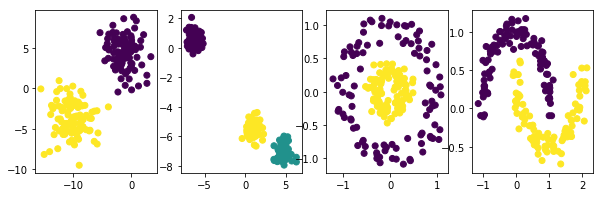

In [1]:
%matplotlib inline
import pylab as plt
import numpy as np
from sklearn.datasets.samples_generator import make_blobs, make_moons, make_circles
np.random.seed(1) #make sure the same random samples are generated each time

noisiness = 1

X_blob, y_blob = make_blobs(n_samples=200, centers=2, cluster_std=2*noisiness, n_features=2)

X_mc, y_mc = make_blobs(n_samples=200, centers=3, cluster_std=0.5*noisiness, n_features=2)

X_circles, y_circles = make_circles(n_samples=200, factor=0.3, noise=0.1*noisiness)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1*noisiness)

fig, axes = plt.subplots(1,4, figsize=(10, 3))

all_datasets = [[X_blob, y_blob],[X_mc, y_mc], [X_circles, y_circles],[X_moons, y_moons]]

for i, Xy_i in enumerate(all_datasets):
    Xi, yi = Xy_i
    axes[i].scatter(Xi[:,0], Xi[:,1], c=yi)

We can implement the model:

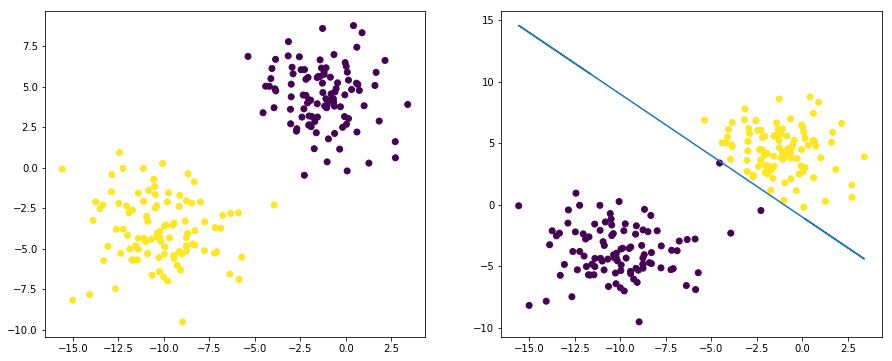

In [2]:
def add_intercept(X):
    intercept = np.ones((X.shape[0],1))
    X_intercept = np.append(intercept,X,1)
    return X_intercept

def linear_classifier(X,w):
    X_intercept = add_intercept(X)
    p = np.dot(X_intercept,w)
    return p > 0

X = X_blob
y = y_blob
y = y_blob*2 - 1 #convert to -1, 1

w = np.array([1,1,1])
prediction = linear_classifier(X,w)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w[1]/w[2]
b = -w[0]/w[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')

and we can implement the max cost loss function:

In [3]:
def max_cost(w, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, -y*Xb))

print(max_cost(w,X,y))

1718.6035896892324


Now, we can solve the model by minimizing the loss function with respect to the parameters:

In [4]:
from scipy.optimize import minimize

result = minimize(max_cost, w)
w_perceptron = result.x
result

      fun: 0.0
 hess_inv: array([[ 1.60336799,  0.22110158, -0.24108711],
       [ 0.22110158,  0.05040071, -0.05268439],
       [-0.24108711, -0.05268439,  0.06436737]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 40
      nit: 4
     njev: 8
   status: 0
  success: True
        x: array([-7.43389635, -1.93063783, -3.47142648])

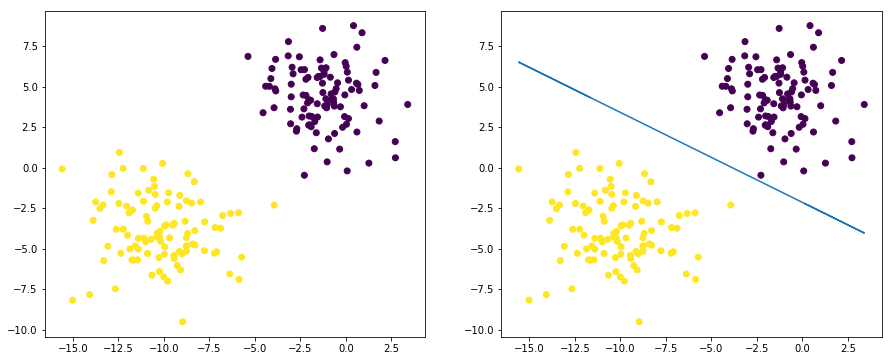

In [5]:
prediction = linear_classifier(X,w_perceptron)

fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_perceptron[1]/w_perceptron[2]
b = -w_perceptron[0]/w_perceptron[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')

### The perceptron as a neural network

It turns out that the "perceptron", invented by Frank Rosenblatt in 1958, was the original neural network. The structure of the perceptron is similar to a biological neuron which "fires" if the sum of its inputs exceed some threshold:

<center>
<img src="images/perceptron_NN.png" width="400">
</center>

The "perceptron" is equivalent to a "single layer" neural network with a step activation function. In fact, all the generalized linear models for classification are single layer neural networks, but with slightly different types of activation functions.

### Discussion: What can go wrong with the max cost loss function?

## Logistic regression

The max cost loss function has two main problems:

(1) There is a trivial solution at $\vec{w} = 0$.

(2) The $max$ function is not differentiable.

We can overcome the second problem by creating some smooth approximation of the maximum function. This is achieved using the "softmax" function:

$max(x,y) \approx soft(x,y) = log(exp(x) + exp(y))$

Text(0,0.5,'max or softmax (0,x)')

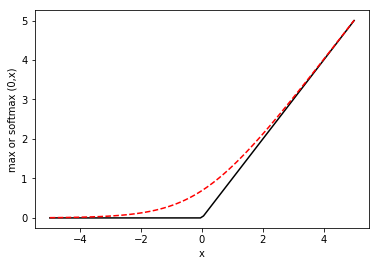

In [6]:
x = np.linspace(-5,5,100)

fig, ax = plt.subplots()

ax.plot(x, np.maximum(0,x), ls='-',color='k')
ax.plot(x, np.log(np.exp(0) + np.exp(x)), ls='--', color='r')

ax.set_xlabel('x')
ax.set_ylabel('max or softmax (0,x)')

We can see that this also gets rid of the "trivial solution" at $\vec{w}=0$, so our problems are solved!

Now we can write a "softmax" cost function:

$g_{softmax}(\vec{w}) = \sum_i log\left\{1 + exp(-y_i \bar{\bar{X}}\vec{w})\right\}$

Let's implement it:

In [7]:
def softmax_cost(w, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    exp_yXb = np.exp(-y*Xb)
    return sum(np.log(1 + exp_yXb))

print(softmax_cost(w,X,y))

1726.1304101411567


This function is differentiable, so we can minimize this with respect to $\vec{w}$ by setting the derivative equal to zero and solving for $\vec{w}$:

$\frac{\partial g_{softmax}}{\partial \vec{w}} = 0$

It turns out this problem is not linear, and needs to be solved iteratively using e.g. Newton's method. The math is a little more complex than before, so we won't cover it in lecture, but it is covered in Ch. 4 of "Machine Learning Refined" if you are interested. This approximation is called **logistic regression**.

The key concept to understand is that $\vec{w}$ is determined by minimizing the softmax cost function. We can do this numerically for our toy model:

[1 1 1]


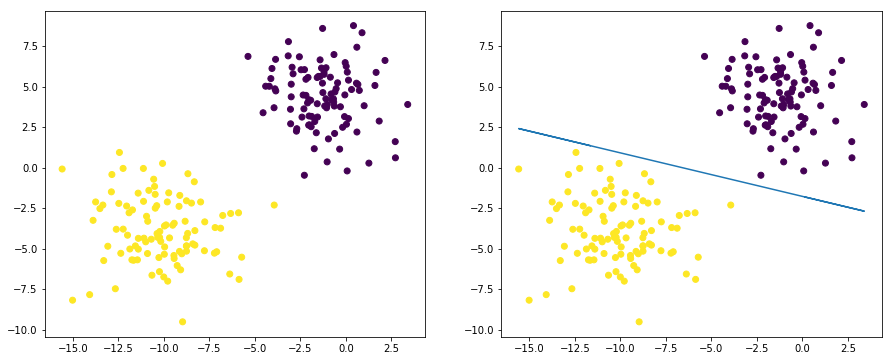

In [8]:
from scipy.optimize import minimize
print(w)
result = minimize(softmax_cost, w, args=(X,y))
w_logit = result.x

prediction = linear_classifier(X,w_logit)
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_logit[1]/w_logit[2]
b = -w_logit[0]/w_logit[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')

Note: There are other ways to derive "logistic regression". See Ch. 4 of ML refined for an alternative derivation.

### Exercise: Compare the loss function for the perceptron and logistic regression after optimization for the "moons" datasets.

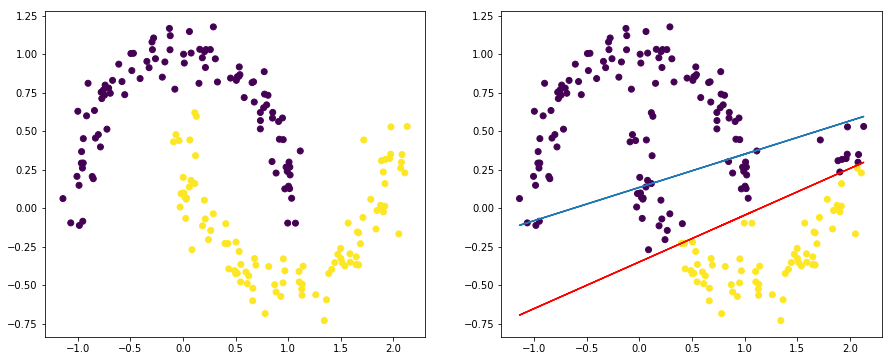

In [9]:
def perceptron_moons(w, X=X_moons, y=y_moons):
    y = y*2 - 1
    return max_cost(w, X, y)

def softmax_moons(w, X=X_moons, y=y_moons):
    y = y*2 - 1
    return softmax_cost(w, X, y)

result = minimize(perceptron_moons, w_logit)
w_perceptron_moons = result.x

result = minimize(softmax_moons, w_logit)
w_logit_moons = result.x

prediction = linear_classifier(X_moons,w_perceptron_moons)
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X_moons[:,0],X_moons[:,1],c=y_moons)
axes[1].scatter(X_moons[:,0],X_moons[:,1],c=prediction)

#plot line
m_logit = -w_logit_moons[1]/w_logit_moons[2]
b_logit = -w_logit_moons[0]/w_logit_moons[2]
axes[1].plot(X_moons[:,0], m_logit*X_moons[:,0]+b_logit, ls='-')


m_percept = -w_perceptron_moons[1]/w_perceptron_moons[2]
b_percept = -w_perceptron_moons[0]/w_perceptron_moons[2]
axes[1].plot(X_moons[:,0], m_percept*X_moons[:,0]+b_percept, ls='-', color='r')

## Margin loss function

Recall the two problems with the max cost function:

1) There is a "trivial solution" at $\vec{w} = 0$

2) The cost function is not differentiable at all points

Logistic regression uses a smooth approximation of the maximum to ensure differentiability, and the "trivial solution" goes away as a side effect.

An alternative approach is to directly eliminate the trivial solution by introducing a "margin" cost function, where we recognize that there will be some "buffer zone" between the classes:

<center>
<img src="images/margin_cost.png" width="500">
</center>

We can write this mathematically as:

$\bar{\bar{X}}\vec{w} \geq 1$ if $y_i=1$ (class 1)

$\bar{\bar{X}}\vec{w} \leq -1$ if $y_i=-1$ (class 2)

by using the same trick of multiplying by $y_i$ and taking a maximum we can write this as an equality:

$max(0, 1 -y_i \bar{\bar{X}}\vec{w}) = 0$

and the corresponding cost/objective function:

$g_{margin}(\vec{w}) = \sum_i max(0, 1-y_i \bar{\bar{X}}\vec{w})$

Note that this is very similar to the cost function for the perceptron, but now there is no trivial solution at $\vec{w} = 0$. However, we can solve this with a few approaches:

1) Use derivative-free numerical approximations

2) Replax $max$ with a differentiable function like $softmax$ or $max^2$

Let's see what happens with strategy 1:

In [10]:
def margin_cost(w, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, 1-y*Xb))

print(margin_cost(w,X,y))

1917.4533603153752


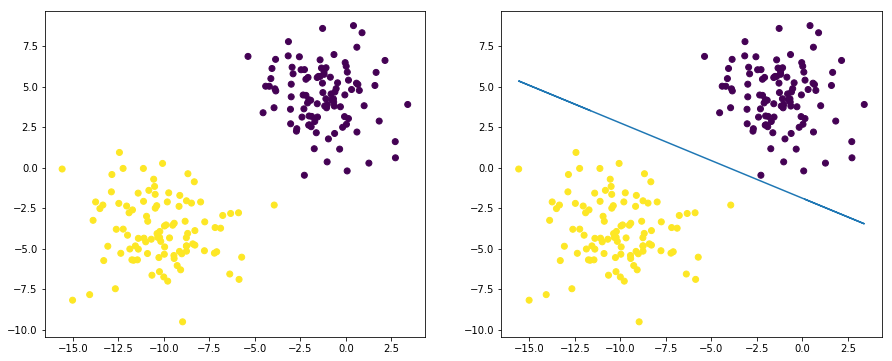

In [11]:
result = minimize(margin_cost, w)

w_opt_margin = result.x

prediction = linear_classifier(X,w_opt_margin)
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_opt_margin[1]/w_opt_margin[2]
b = -w_opt_margin[0]/w_opt_margin[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')

It works, but we get a different solution from logistic regression. Let's see how this compares to the $max^2$ and $softmax$ approximations:

In [12]:
def margin_cost_squared(beta, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,beta)
    return sum(np.maximum(0, 1-y*Xb)**2)

def margin_cost_softmax(beta, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,beta)
    exp_yXb = np.exp(1-y*Xb)
    return sum(np.log(1 + exp_yXb))

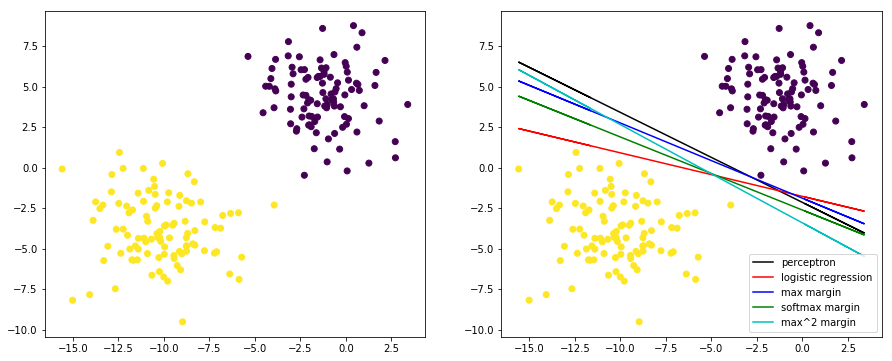

In [14]:
result = minimize(margin_cost_squared, w, method='Nelder-Mead')
w_opt_margin2 = result.x

result = minimize(margin_cost_softmax, w, method='Nelder-Mead')
w_opt_softmax = result.x

prediction = linear_classifier(X,w_opt_softmax)
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot lines
def plot_line(ax, color, w, X, label):
    m = -w[1]/w[2]
    b = -w[0]/w[2]
    ax.plot(X[:,0], m*X[:,0]+b, ls='-', color=color, label=label)
    
labels = ['perceptron', 'logistic regression', 'max margin', 'softmax margin', 'max^2 margin']
w_set = [w_perceptron, w_logit,w_opt_margin, w_opt_margin2, w_opt_softmax]
colors = ['k','r','b','g', 'c']

for w_i, color, label in zip(w_set, colors,labels):
    plot_line(axes[1], color, w_i, X, label)
    
axes[1].legend()

### Discussion: Which of these models is the best?

There are infinitely many lines that have equal cost for a linearly-separable dataset. The line that you find will depend on the approximation used, and can also depend on the initial guesses for the parameter $\vec{w}$. As we will see, additional constraints can be added to the loss function to alleviate this issue.

## Counting loss function

Recall from the prior lecture that we can also set up a loss function that counts the total number of mis-classified points:

In [15]:
def n_wrong(w, X=X, y=y):
    X_intercept = add_intercept(X)
    Xb = np.dot(X_intercept,w)
    return sum(np.maximum(0, np.sign(-y*Xb)))

print(n_wrong(w_logit))

0.0


In principle, we can also minimize this directly:

198.0


      fun: 198.0
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 5
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([1., 1., 1.])

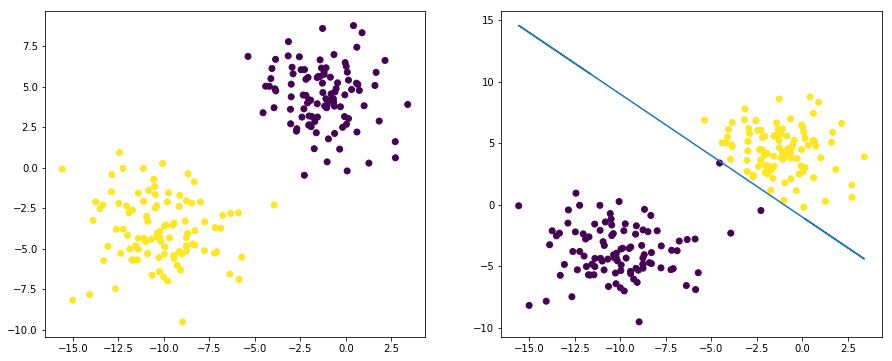

In [17]:
result = minimize(n_wrong, [1,1,1])

w_count = result.x
print(n_wrong(w_count))

prediction = linear_classifier(X,w_count)
fig, axes = plt.subplots(1,2,figsize=(15,6))
axes[0].scatter(X[:,0],X[:,1],c=y)
axes[1].scatter(X[:,0],X[:,1],c=prediction)

#plot line
m = -w_count[1]/w_count[2]
b = -w_count[0]/w_count[2]
axes[1].plot(X[:,0], m*X[:,0]+b, ls='-')
result

The problem is that the "sign" function is not differentiable! This makes it a bad loss function. In general, we expect that minimizing the loss functions should also minimize the number of incorrect points, but this isn't always the case.

### Discussion: How will the different cost functions respond to outliers?